In [97]:
# import the packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [174]:
df = pd.read_csv('movies.csv')

In [101]:
# Check for missing data

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [176]:
df = df.dropna()

In [105]:
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [107]:
#check data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [178]:
#changing the datatype 

df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['name'] = df['name'].astype('category')

In [180]:
#drop released column since there is year column
df = df.drop('released', axis=1)

In [113]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [115]:
#drop duplicates if any

df.drop_duplicates()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5.073000e+03,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1993,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2.970000e+03,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2000,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2.554000e+03,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2.270000e+03,Embassy Pictures,85


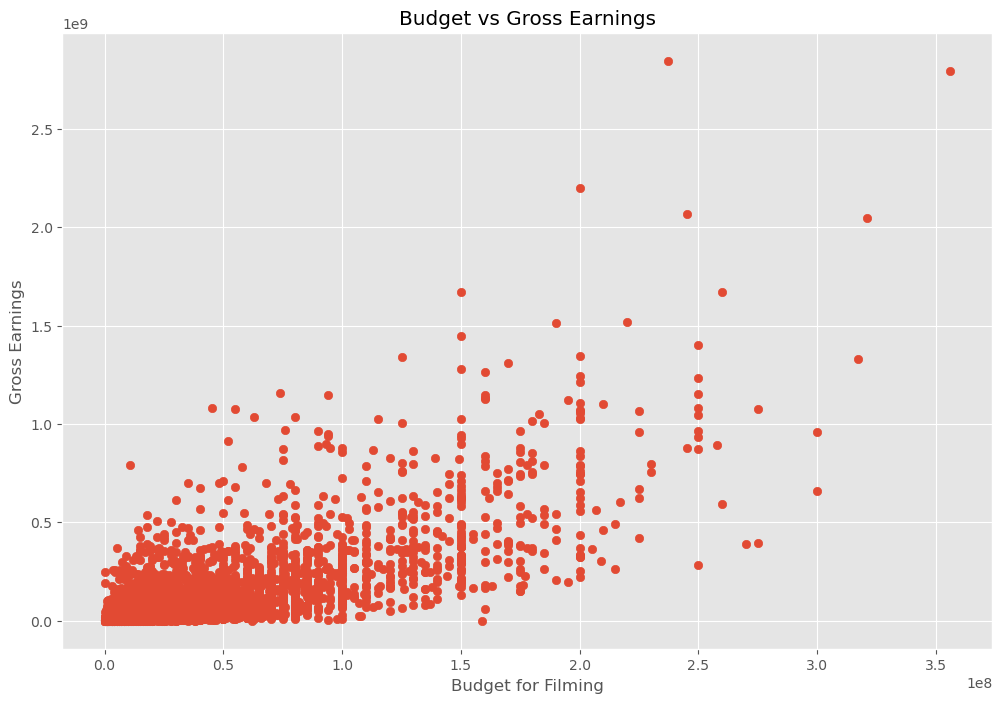

In [117]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Filming')

plt.show()

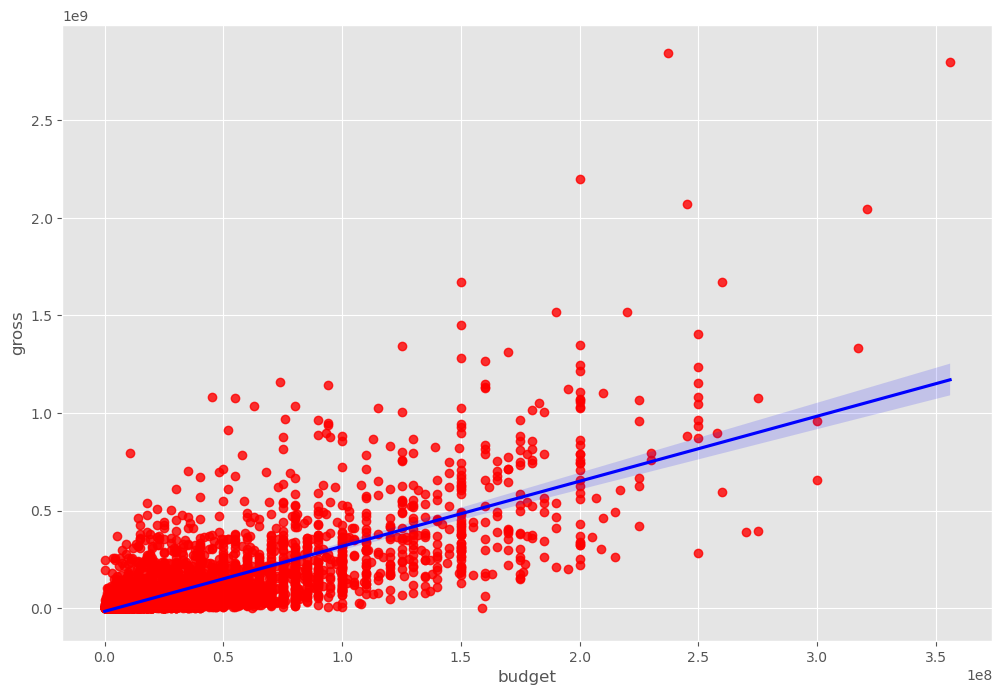

In [119]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws = {"color": "red"}, line_kws = {"color":"blue"})
plt.show()

In [121]:
#correlation
df.corr(numeric_only = True) #pearson default

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [123]:
df.corr(method ="pearson" ,numeric_only = True)
# high correlation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


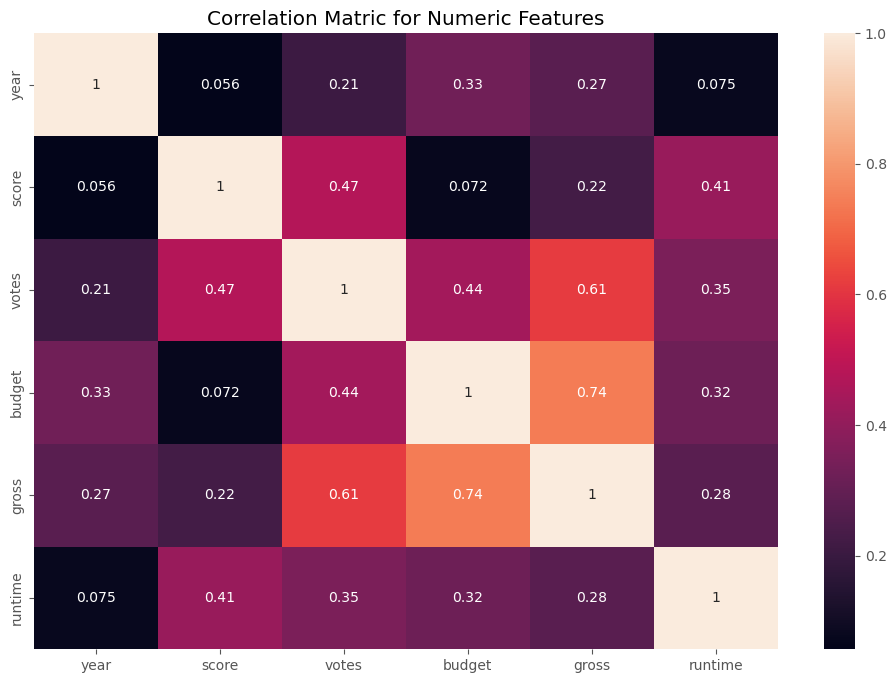

In [125]:
# Correlation Matric for Numeric Features

correlation_matrix = df.corr(method='pearson', numeric_only = True)

plt.title('Correlation Matric for Numeric Features')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [127]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149


In [148]:
df_numerized = df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'category'):
        df_numerized[col] = df_numerized[col].astype('category').cat.codes
df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,7.8,1100000,785,1263,1534,47,237000000,2.847246e+09,1382,162
7445,388,5,0,2019,8.4,903000,105,513,1470,47,356000000,2.797501e+09,983,181
3045,4909,5,6,1997,7.8,1100000,785,1263,1073,47,200000000,2.201647e+09,1382,194
6663,3643,5,0,2015,7.8,876000,768,1806,356,47,245000000,2.069522e+09,945,138
7244,389,5,0,2018,8.4,897000,105,513,1470,47,321000000,2.048360e+09,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,5.8,3500,585,2924,1498,47,3000000,5.073000e+03,1385,96
2434,2969,5,0,1993,4.5,1900,1805,3102,186,47,5000000,2.970000e+03,1376,97
3681,1595,3,6,2000,6.8,43000,952,1683,527,6,5000000,2.554000e+03,466,108
272,2909,6,9,1982,3.9,2300,261,55,1473,47,800000,2.270000e+03,582,85


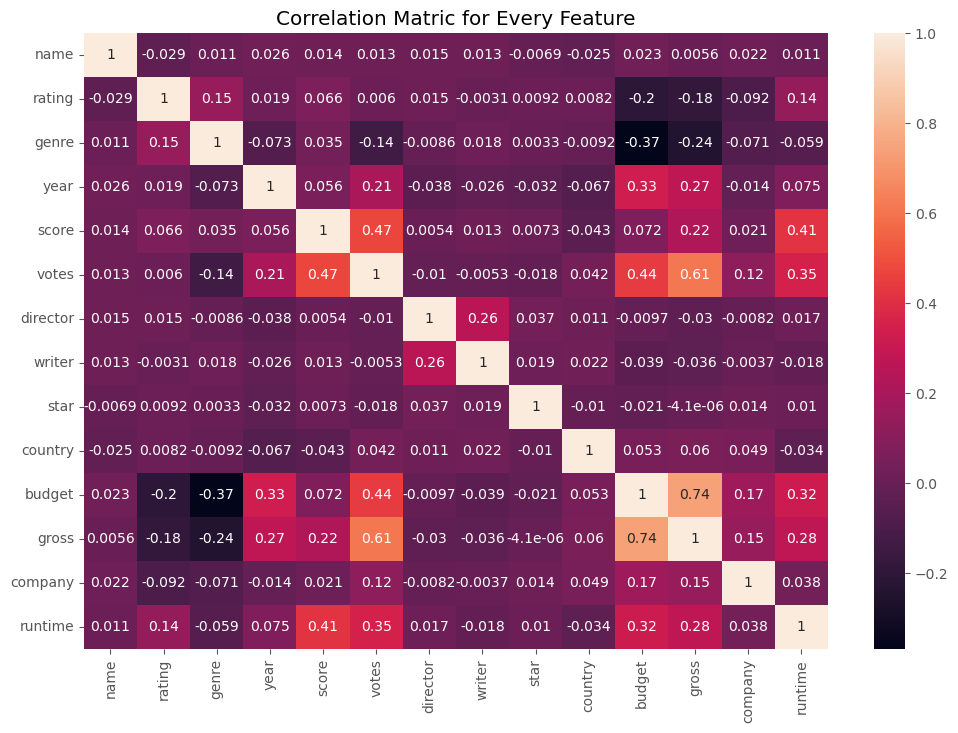

In [152]:
# Correlation Matric for all columns

correlation_matrix = df_numerized.corr(method='pearson', numeric_only = True)

plt.title('Correlation Matric for Every Feature')

sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [160]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name       1.000000
         rating    -0.029234
         genre      0.010996
         year       0.025542
         score      0.014450
                      ...   
runtime  country   -0.034477
         budget     0.318695
         gross      0.275796
         company    0.037585
         runtime    1.000000
Length: 196, dtype: float64

In [162]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre    budget    -0.368523
budget   genre     -0.368523
gross    genre     -0.244101
genre    gross     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 196, dtype: float64


In [168]:
# the ones that have a high correlation (> 0.5)

high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]

print(high_corr)

gross     votes       0.614751
votes     gross       0.614751
budget    gross       0.740247
gross     budget      0.740247
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [170]:
#votes and budget have the highest correlation to gross earnings
#company has low correlation